# Machine Learning 2020-2021 - UMONS 
# Exploratory Data Analysis with Pandas (Tutorial) 


If you use Colab, you must run this line first.
Then restart the kernels (Exécution --> Redémarrer l'environnement d'exécution)

In [ ]:
pip install xlrd==1.2.0

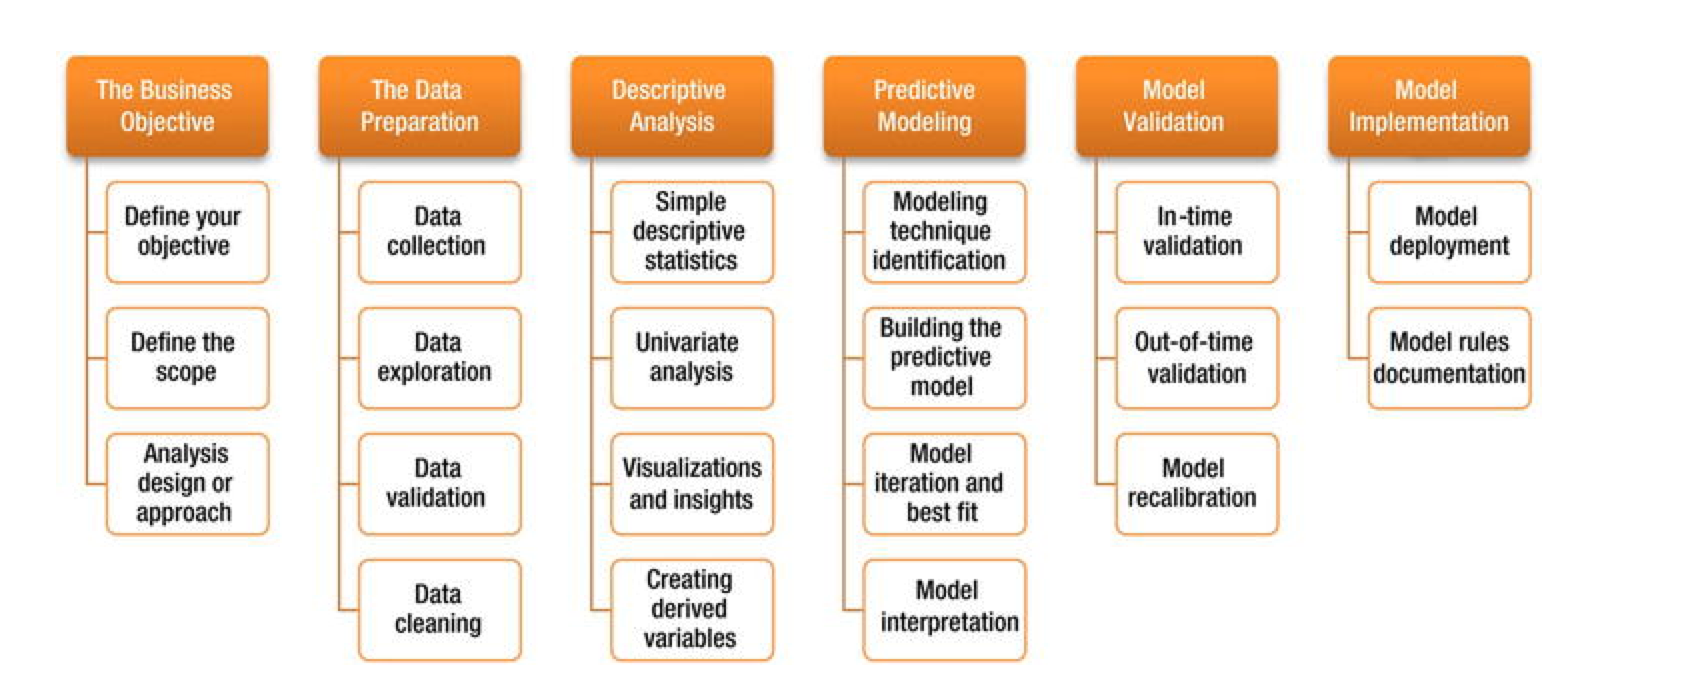

In [ ]:
from IPython.display import Image
# Load image from local storage
Image(filename = "dspipeline.png", width = 600, height = 300)


In [ ]:
import pandas as pd

#data = pd.read_csv("data/titanic-data.csv")

raw_data = pd.read_excel("data/titanic.xls")

raw_data.head()


pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

1.  ** pclass:** Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
2.  ** survived:** Outcome of survival (0 = No; 1 = Yes)
3.  ** name:** Name of passenger
4.  ** sex: **Sex of the passenger
5.  ** age:** Age of the passenger (Some entries contain NaN)
6.  ** sibsp:** Number of siblings and spouses of the passenger aboard
7.  ** parch:** Number of parents and children of the passenger aboard
8.  ** ticket:** Ticket number of the passenger
9.  ** fare: **Fare paid by the passenger
10. ** cabin** Cabin number of the passenger (Some entries contain NaN)
11. ** embarked:** Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)
12. ...

In [ ]:
raw_data.shape


(1309, 14)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
raw_data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [ ]:
raw_data.dtypes


pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [ ]:
raw_data.head(5)

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [ ]:
raw_data.tail(100)

pclass  survived                                             name  \
1209       3         0                    Skoog, Miss. Margit Elizabeth   
1210       3         0                               Skoog, Mr. Wilhelm   
1211       3         0  Skoog, Mrs. William (Anna Bernhardina Karlsson)   
1212       3         0                             Slabenoff, Mr. Petco   
1213       3         0                    Slocovski, Mr. Selman Francis   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex   age  sibsp  parch           ticket     fare cabin embarked  \
1209  female   2.0      3      2           347088  27.9000   NaN        S   
1210    male  40.0      1      4           347088  27.9000   NaN        S   
1211  female  45.0      1      4           347088  27.9000   NaN        S   
1212    male   NaN      0      0           349214   7.8958   NaN        S   
1213    male   NaN      0      0  SOTON/OQ 392086   8.0500   NaN        S   
...      ...   ...    ...    ...              ...      ...   ...      ...   
1304  female  14.5      1      0             2665  14.4542   NaN        C   
1305  female   NaN      1      0             2665  14.4542   NaN        C   
1306    male  26.5      0      0             2656   7.2250   NaN        C   
1307    male  27.0      0      0             2670   7.2250   NaN        C   
1308    male  29.0      0      0           315082   7.8750   NaN        S   

     boat   body home.dest  
1209  NaN    NaN       NaN  
1210  NaN    NaN       NaN  
1211  NaN    NaN       NaN  
1212  NaN    NaN       NaN  
1213  NaN    NaN       NaN  
...   ...    ...       ...  
1304  NaN  328.0       NaN  
1305  NaN    NaN       NaN  
1306  NaN  304.0       NaN  
1307  NaN    NaN       NaN  
1308  NaN    NaN       NaN  

[100 rows x 14 columns]

In [ ]:
raw_data.describe()


pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000

In [ ]:
raw_data.isnull()

pclass  survived   name    sex    age  sibsp  parch  ticket   fare  \
0      False     False  False  False  False  False  False   False  False   
1      False     False  False  False  False  False  False   False  False   
2      False     False  False  False  False  False  False   False  False   
3      False     False  False  False  False  False  False   False  False   
4      False     False  False  False  False  False  False   False  False   
...      ...       ...    ...    ...    ...    ...    ...     ...    ...   
1304   False     False  False  False  False  False  False   False  False   
1305   False     False  False  False   True  False  False   False  False   
1306   False     False  False  False  False  False  False   False  False   
1307   False     False  False  False  False  False  False   False  False   
1308   False     False  False  False  False  False  False   False  False   

      cabin  embarked   boat   body  home.dest  
0     False     False  False   True      False  
1     False     False  False   True      False  
2     False     False   True   True      False  
3     False     False   True  False      False  
4     False     False   True   True      False  
...     ...       ...    ...    ...        ...  
1304   True     False   True  False       True  
1305   True     False   True   True       True  
1306   True     False   True  False       True  
1307   True     False   True   True       True  
1308   True     False   True   True       True  

[1309 rows x 14 columns]

In [ ]:
raw_data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [ ]:
#data_copy = data.copy()

NameError: name 'data' is not defined

# Pandas Series and DataFrame

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html


In [ ]:
print(type(raw_data["age"]))

<class 'pandas.core.series.Series'>


In [ ]:
print(type(    raw_data[    ["age"]   ]    ))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(type(raw_data[["age", "sex"] ]))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
raw_data.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [ ]:
raw_data.index

RangeIndex(start=0, stop=1309, step=1)

In [ ]:
raw_data.set_index("name")

pclass  survived     sex  \
name                                                                        
Allen, Miss. Elisabeth Walton                         1         1  female   
Allison, Master. Hudson Trevor                        1         1    male   
Allison, Miss. Helen Loraine                          1         0  female   
Allison, Mr. Hudson Joshua Creighton                  1         0    male   
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)       1         0  female   
...                                                 ...       ...     ...   
Zabour, Miss. Hileni                                  3         0  female   
Zabour, Miss. Thamine                                 3         0  female   
Zakarian, Mr. Mapriededer                             3         0    male   
Zakarian, Mr. Ortin                                   3         0    male   
Zimmerman, Mr. Leo                                    3         0    male   

                                                     age  sibsp  parch  \
name                                                                     
Allen, Miss. Elisabeth Walton                    29.0000      0      0   
Allison, Master. Hudson Trevor                    0.9167      1      2   
Allison, Miss. Helen Loraine                      2.0000      1      2   
Allison, Mr. Hudson Joshua Creighton             30.0000      1      2   
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  25.0000      1      2   
...                                                  ...    ...    ...   
Zabour, Miss. Hileni                             14.5000      1      0   
Zabour, Miss. Thamine                                NaN      1      0   
Zakarian, Mr. Mapriededer                        26.5000      0      0   
Zakarian, Mr. Ortin                              27.0000      0      0   
Zimmerman, Mr. Leo                               29.0000      0      0   

                                                 ticket      fare    cabin  \
name                                                                         
Allen, Miss. Elisabeth Walton                     24160  211.3375       B5   
Allison, Master. Hudson Trevor                   113781  151.5500  C22 C26   
Allison, Miss. Helen Loraine                     113781  151.5500  C22 C26   
Allison, Mr. Hudson Joshua Creighton             113781  151.5500  C22 C26   
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  113781  151.5500  C22 C26   
...                                                 ...       ...      ...   
Zabour, Miss. Hileni                               2665   14.4542      NaN   
Zabour, Miss. Thamine                              2665   14.4542      NaN   
Zakarian, Mr. Mapriededer                          2656    7.2250      NaN   
Zakarian, Mr. Ortin                                2670    7.2250      NaN   
Zimmerman, Mr. Leo                               315082    7.8750      NaN   

                                                embarked boat   body  \
name                                                                   
Allen, Miss. Elisabeth Walton                          S    2    NaN   
Allison, Master. Hudson Trevor                         S   11    NaN   
Allison, Miss. Helen Loraine                           S  NaN    NaN   
Allison, Mr. Hudson Joshua Creighton                   S  NaN  135.0   
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)        S  NaN    NaN   
...                                                  ...  ...    ...   
Zabour, Miss. Hileni                                   C  NaN  328.0   
Zabour, Miss. Thamine                                  C  NaN    NaN   
Zakarian, Mr. Mapriededer                              C  NaN  304.0   
Zakarian, Mr. Ortin                                    C  NaN    NaN   
Zimmerman, Mr. Leo                                     S  NaN    NaN   

                                                                       home.dest  
name                                             

## Data cleaning

In [ ]:
raw_data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [ ]:
raw_data.isna().sum()


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [ ]:
raw_data.notna().sum()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [ ]:
(raw_data.isna().sum()/raw_data.shape[0]).sort_values(ascending=True)

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
embarked     0.001528
age          0.200917
home.dest    0.430863
boat         0.628724
cabin        0.774637
body         0.907563
dtype: float64

<AxesSubplot:>

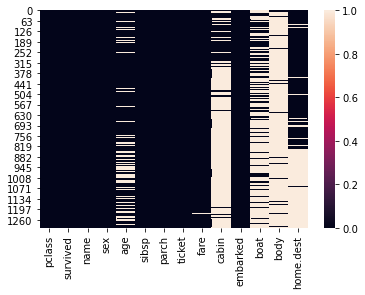

In [ ]:
import seaborn as sns
sns.heatmap(raw_data.isna())

### Dealing with missing values

- Remove missing values: 
    - remove rows/columns with missing columns
    - drop rows/columns by percentage of missing values  
    - see pd.dropna(axis = , thresh = )
- Impute missing values:
    - Filling with generic values
    - Filling with central tendencies
    - see pd.fillna(), pd.bfill(), pd.ffill(), etc



In [ ]:
raw_data["embarked"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: embarked, Length: 1309, dtype: bool

In [ ]:
raw_data["embarked"].isnull().sum() # only 2 missing values

2

In [ ]:
raw_data["embarked"]

0       S
1       S
2       S
3       S
4       S
       ..
1304    C
1305    C
1306    C
1307    C
1308    S
Name: embarked, Length: 1309, dtype: object

In [ ]:
raw_data["embarked"].value_counts()


S    914
C    270
Q    123
Name: embarked, dtype: int64

In [ ]:
raw_data['embarked'].fillna('S', inplace=True)

In [ ]:
data = raw_data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)
data.head()


pclass  survived     sex      age
0       1         1  female  29.0000
1       1         1    male   0.9167
2       1         0  female   2.0000
3       1         0    male  30.0000
4       1         0  female  25.0000

In [ ]:
data["age"].isna().sum()

263

In [ ]:
assert  data['age'].notnull().all()

AssertionError: 

In [ ]:
# data = data.dropna(axis=0)
data.dropna(axis=0, inplace = True)
data.shape

In [ ]:
assert  data['age'].notnull().all()

In [ ]:
data['sex'] = data['sex'].astype('category')
data['pclass'] = data['pclass'].astype('category')


In [ ]:
data1 = data.head()
data2 = data.tail()
conc_data_row = pd.concat([data1,data2],axis = 0,ignore_index =True) 
conc_data_row

pclass  survived     sex      age
0      1         1  female  29.0000
1      1         1    male   0.9167
2      1         0  female   2.0000
3      1         0    male  30.0000
4      1         0  female  25.0000
5      3         0    male  45.5000
6      3         0  female  14.5000
7      3         0    male  26.5000
8      3         0    male  27.0000
9      3         0    male  29.0000

In [ ]:
data1 = data['age'].head()
data2= data['sex'].head()
conc_data_col = pd.concat([data1,data2], axis = 1) 
conc_data_col

age     sex
0  29.0000  female
1   0.9167    male
2   2.0000  female
3  30.0000    male
4  25.0000  female

## Indexing and filtering

In [ ]:
# indexing using square brackets
data["age"][0:9]


0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
5    48.0000
6    63.0000
7    39.0000
8    53.0000
Name: age, dtype: float64

In [ ]:
# using column attribute and row label
data.age[0:9]

0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
5    48.0000
6    63.0000
7    39.0000
8    53.0000
Name: age, dtype: float64

In [ ]:
# using loc accessor
data.loc[0:9,"survived"]

0    1
1    1
2    0
3    0
4    0
5    1
6    1
7    0
8    1
9    0
Name: survived, dtype: int64

In [ ]:
data.loc[0:9,["age", "sex"]]


age     sex
0  29.0000  female
1   0.9167    male
2   2.0000  female
3  30.0000    male
4  25.0000  female
5  48.0000    male
6  63.0000  female
7  39.0000    male
8  53.0000  female
9  71.0000    male

In [ ]:
data.iloc[0:10, 0:2]

pclass  survived
0      1         1
1      1         1
2      1         0
3      1         0
4      1         0
5      1         1
6      1         1
7      1         0
8      1         1
9      1         0

In [ ]:
# Selecting only some columns
data[["survived","pclass"]]

survived pclass
0            1      1
1            1      1
2            0      1
3            0      1
4            0      1
...        ...    ...
1301         0      3
1304         0      3
1306         0      3
1307         0      3
1308         0      3

[1046 rows x 2 columns]

In [ ]:
# Creating boolean series
mask = data.age > 70
data[mask]
data[data.age > 70]

pclass  survived     sex   age
9         1         0    male  71.0
14        1         1    male  80.0
61        1         1  female  76.0
135       1         0    male  71.0
727       3         0    male  70.5
1235      3         0    male  74.0

In [ ]:
first_mask = data.age > 70
second_mask = data.survived == 1
data[first_mask & second_mask]

data[data.age > 70].shape

(6, 4)

In [ ]:
data.head()

pclass  survived     sex      age
0      1         1  female  29.0000
1      1         1    male   0.9167
2      1         0  female   2.0000
3      1         0    male  30.0000
4      1         0  female  25.0000

In [ ]:
raw_data.name

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: name, Length: 1309, dtype: object

In [ ]:
# Filtering column based on others
raw_data.name[raw_data.age<10]

1        Allison, Master. Hudson Trevor
2          Allison, Miss. Helen Loraine
94            Dodge, Master. Washington
273     Spedden, Master. Robert Douglas
339           Becker, Master. Richard F
                     ...               
1209      Skoog, Miss. Margit Elizabeth
1230         Strom, Miss. Telma Matilda
1240    Thomas, Master. Assad Alexander
1256     Touma, Master. Georges Youssef
1257         Touma, Miss. Maria Youssef
Name: name, Length: 82, dtype: object

In [ ]:
def div(n):
    return n/2
data.age.apply(div)

0       14.50000
1        0.45835
2        1.00000
3       15.00000
4       12.50000
          ...   
1301    22.75000
1304     7.25000
1306    13.25000
1307    13.50000
1308    14.50000
Name: age, Length: 1046, dtype: float64

In [ ]:
data.age.apply(lambda n : n/2)


0       14.50000
1        0.45835
2        1.00000
3       15.00000
4       12.50000
          ...   
1301    22.75000
1304     7.25000
1306    13.25000
1307    13.50000
1308    14.50000
Name: age, Length: 1046, dtype: float64

# Data visualization and summaries

<AxesSubplot:>

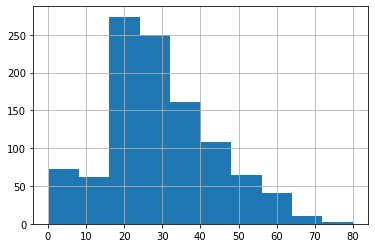

In [ ]:
data['age'].hist()

<AxesSubplot:>

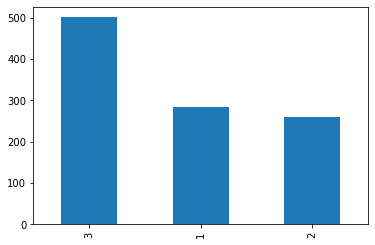

In [ ]:
data['pclass'].value_counts().plot.bar()

<AxesSubplot:xlabel='age', ylabel='fare'>

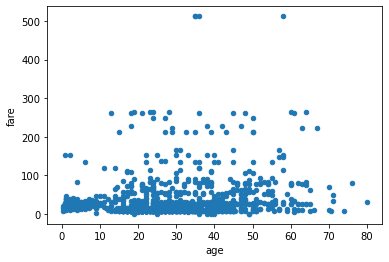

In [ ]:
raw_data.plot(kind = "scatter",x="age",y = "fare")


<AxesSubplot:title={'center':'age'}, xlabel='sex'>

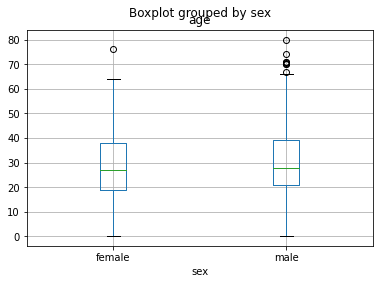

In [ ]:
data.boxplot(column='age',by = 'sex')

In [ ]:
data.groupby(['sex']).mean()


survived        age
sex                        
female  0.752577  28.687071
male    0.205167  30.585233

In [ ]:
data.groupby(['sex', 'pclass']).mean()


survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [ ]:
data['pclass'].value_counts().sort_values()


2    261
1    284
3    501
Name: pclass, dtype: int64

In [ ]:
data[data['age'] < 18]['pclass'].value_counts().sort_values()


1     15
2     33
3    106
Name: pclass, dtype: int64

In [ ]:
def category_ages(age):
    if age <= 20:
        return '<20 ans'
    elif (age > 20) & (age <= 30):
        return '20-30 ans'
    elif (age > 30) & (age <= 40):
        return '30-40 ans'
    else:
        return '+40 ans'

data['cat_ages'] = data['age'].map(category_ages)
data.head()

pclass  survived     sex      age   cat_ages
0      1         1  female  29.0000  20-30 ans
1      1         1    male   0.9167    <20 ans
2      1         0  female   2.0000    <20 ans
3      1         0    male  30.0000  20-30 ans
4      1         0  female  25.0000  20-30 ans

In [ ]:
data["age_new"] = data["age"]/100
data.head()

pclass  survived     sex      age   cat_ages   age_new
0      1         1  female  29.0000  20-30 ans  0.290000
1      1         1    male   0.9167    <20 ans  0.009167
2      1         0  female   2.0000    <20 ans  0.020000
3      1         0    male  30.0000  20-30 ans  0.300000
4      1         0  female  25.0000  20-30 ans  0.250000

In [ ]:
data["income"] = 0 # broadcasting
data.head()

pclass  survived     sex      age   cat_ages   age_new  income
0      1         1  female  29.0000  20-30 ans  0.290000       0
1      1         1    male   0.9167    <20 ans  0.009167       0
2      1         0  female   2.0000    <20 ans  0.020000       0
3      1         0    male  30.0000  20-30 ans  0.300000       0
4      1         0  female  25.0000  20-30 ans  0.250000       0

In [ ]:
data['sex'].astype('category').cat.codes


0       0
1       1
2       0
3       1
4       0
       ..
1301    1
1304    0
1306    1
1307    1
1308    1
Length: 1046, dtype: int8

<AxesSubplot:xlabel='sex', ylabel='count'>

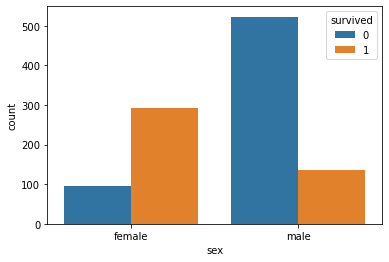

In [ ]:
import seaborn as sns
sns.countplot(x='sex', hue='survived', data=data)

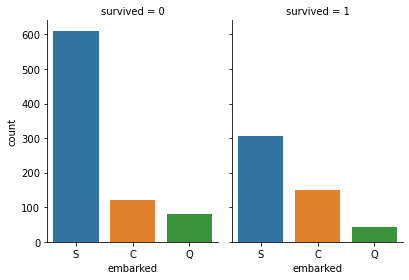

In [ ]:
sns.catplot(x="embarked", col="survived",
                 data=raw_data, kind="count",
                 height=4, aspect=.7)

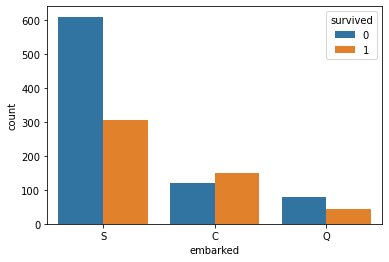

In [ ]:
g = sns.countplot(x='embarked', hue='survived', data=raw_data)

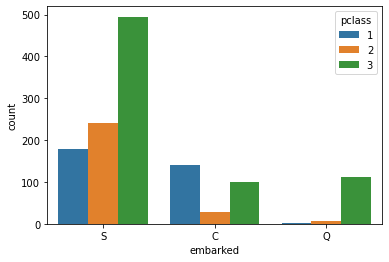

In [ ]:
g = sns.countplot(x='embarked', hue='pclass', data=raw_data)

In [ ]:
def add_family(df):
    df['familysize'] = df['sibsp'] + df['parch'] + 1 
    return df

new_data = add_family(raw_data)
new_data.head(10)

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
5       1         1                              Anderson, Mr. Harry    male   
6       1         1                Andrews, Miss. Kornelia Theodosia  female   
7       1         0                           Andrews, Mr. Thomas Jr    male   
8       1         1    Appleton, Mrs. Edward Dale (Charlotte Lamson)  female   
9       1         0                          Artagaveytia, Mr. Ramon    male   

       age  sibsp  parch    ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0     24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2    113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2    113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2    113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2    113781  151.5500  C22 C26        S  NaN    NaN   
5  48.0000      0      0     19952   26.5500      E12        S    3    NaN   
6  63.0000      1      0     13502   77.9583       D7        S   10    NaN   
7  39.0000      0      0    112050    0.0000      A36        S  NaN    NaN   
8  53.0000      2      0     11769   51.4792     C101        S    D    NaN   
9  71.0000      0      0  PC 17609   49.5042      NaN        C  NaN   22.0   

                         home.dest  familysize  
0                     St Louis, MO           1  
1  Montreal, PQ / Chesterville, ON           4  
2  Montreal, PQ / Chesterville, ON           4  
3  Montreal, PQ / Chesterville, ON           4  
4  Montreal, PQ / Chesterville, ON           4  
5                     New York, NY           1  
6                       Hudson, NY           2  
7                      Belfast, NI           1  
8              Bayside, Queens, NY           3  
9              Montevideo, Uruguay           1

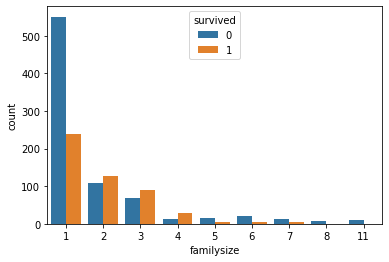

In [ ]:
sns.countplot(x="familysize", hue="survived",
                 data=new_data);